In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-take-off-data-jfk-airport/M1_final.csv


## Reading Data

In [2]:
file="../input/flight-take-off-data-jfk-airport/M1_final.csv"
data=pd.read_csv(file)
print(data)

       MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  \
0         11             1            5                B6   N828JB  CHS   
1         11             1            5                B6   N992JB  LAX   
2         11             1            5                B6   N959JB  FLL   
3         11             1            5                B6   N999JQ  MCO   
4         11             1            5                DL   N880DN  ATL   
...      ...           ...          ...               ...      ...  ...   
28815      1            31            5                B6   N216JB  ORH   
28816      1            31            5                AA   N104NN  BOS   
28817      1            31            5                AS   N581AS  SEA   
28818      1            31            5                B6   N957JB  SJU   
28819      1            31            5                B6   N958JB  BQN   

       DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  \
0             -1        

In [3]:
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
print(data.shape)
data.drop("TAIL_NUM",axis=1,inplace=True)

(28820, 23)


In [5]:
print(data.shape)

(28820, 22)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Seeing Correlation

<AxesSubplot:>

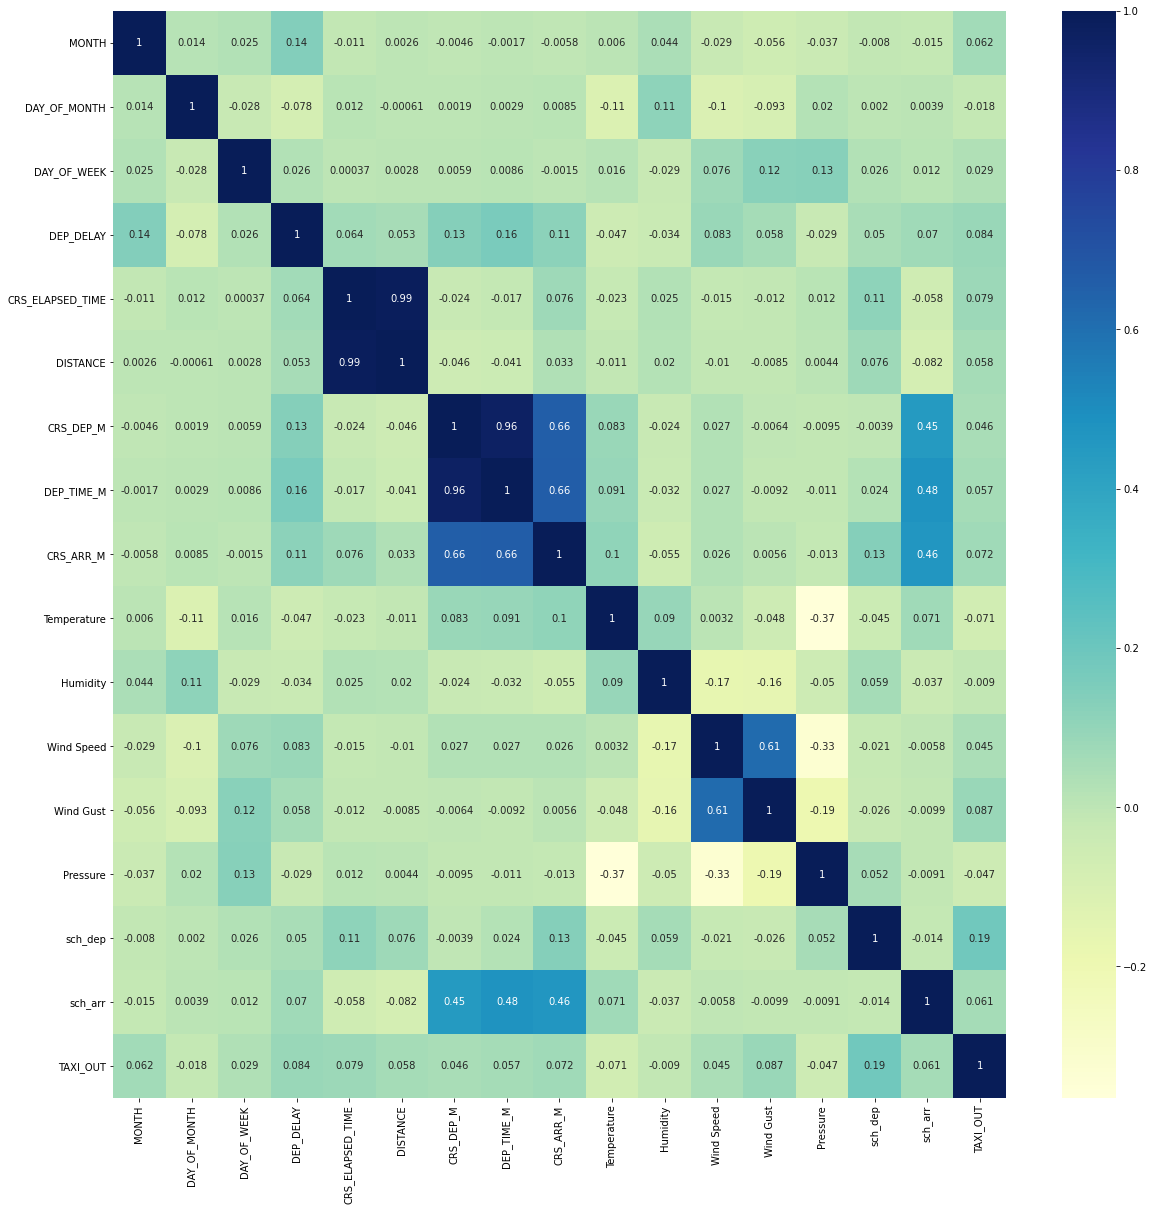

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr('spearman'),cmap='YlGnBu',annot = True)

<AxesSubplot:title={'center':'correlation with TAXI_OUT'}>

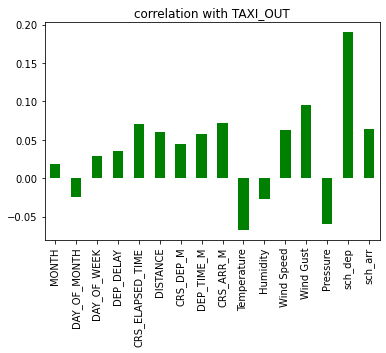

In [8]:
data.drop(['TAXI_OUT'],axis = 1).corrwith(data['TAXI_OUT']).plot(kind = 'bar',color="green", title = 'correlation with TAXI_OUT')

## Preprocessing

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data.OP_UNIQUE_CARRIER=label_encoder.fit_transform(data.OP_UNIQUE_CARRIER)
data["DEST"]= label_encoder.fit_transform(data["DEST"])
data["Wind"]= label_encoder.fit_transform(data["Wind"].astype(str))
data["Condition"]= label_encoder.fit_transform(data["Condition"])
data["Dew Point"]= label_encoder.fit_transform(data["Dew Point"])

In [10]:
x=data.drop("TAXI_OUT",axis=1)
x.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr
0,11,1,5,3,10,-1,124,636,324,323,...,48,30,58,15,25,38,29.86,4,9,17
1,11,1,5,3,28,-7,371,2475,340,333,...,48,30,58,15,25,38,29.86,4,9,17
2,11,1,5,3,20,40,181,1069,301,341,...,48,30,58,15,25,38,29.86,4,9,17
3,11,1,5,3,30,-2,168,944,345,343,...,48,30,58,15,25,38,29.86,4,9,17
4,11,1,5,4,1,-4,139,760,360,356,...,46,28,58,15,24,35,29.91,4,9,17


In [11]:
x.shape

(28820, 21)

In [12]:
y=data.TAXI_OUT
y.shape

(28820,)

## Test Train Splitting

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(25938, 21)
(25938,)
(2882, 21)
(2882,)


## Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linr=LinearRegression()
linr.fit(x_train,y_train)
prediction=linr.predict(x_test)
linerror=mean_squared_error(y_test,prediction,squared=False)
linerror

6.772225563946721

## Ridge Regression Model

In [16]:
from sklearn.linear_model import Ridge
ridgr=Ridge(alpha=1,normalize=True)
ridgr.fit(x_train,y_train)
predictionr=ridgr.predict(x_test)
ridgerror=mean_squared_error(y_test,predictionr,squared=False)
ridgerror

6.860245261741932

## Lasso Regression Model

In [17]:
from sklearn.linear_model import Lasso
lassor=Lasso(alpha=1,normalize=True)
lassor.fit(x_train,y_train)
predictionl=lassor.predict(x_test)
lassoerror=mean_squared_error(y_test,predictionl,squared=False)
lassoerror

7.071584874715117

## KNN Model

In [18]:
from sklearn.neighbors import KNeighborsRegressor
Knnmodel=KNeighborsRegressor(n_neighbors=200)
Knnmodel.fit(x_train,y_train)
predictionknn=Knnmodel.predict(x_test)
knnerror=mean_squared_error(y_test,predictionknn,squared=False)
knnerror

6.865667293028155

## SVR Model

In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sa=StandardScaler()
sb=StandardScaler()
a=x_train.copy()
b=x_test.copy()
a=sa.fit_transform(a)
b=sb.fit_transform(b)
svr=SVR()
svr.fit(a,y_train)
predictionsvr=svr.predict(b)
svrerror=mean_squared_error(y_test,predictionsvr,squared=False)
svrerror

6.486952231603621

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
randomf=RandomForestRegressor()
randomf.fit(x_train,y_train)
predictrandom=randomf.predict(x_test)
randomferror=mean_squared_error(y_test,predictrandom,squared=False)
randomferror

5.705602157092391

## LGBM Model

In [21]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(x_train,y_train)
predictlgbm=lgbm.predict(x_test)
lgbmerror=mean_squared_error(y_test,predictlgbm,squared=False)
lgbmerror

5.822986171161175

## NBM Model

In [22]:
from sklearn.linear_model import BayesianRidge
b_ridge=BayesianRidge()
b_ridge.fit(x_train,y_train)
predictb_ridge=b_ridge.predict(x_test)
b_ridge_error=mean_squared_error(y_test,predictb_ridge,squared=False)
b_ridge_error

6.77462061962708

## ONE HOT ENCODING

In [23]:
from sklearn.preprocessing import OneHotEncoder
x= (data.dtypes == "object")
columns=list(x[x].index)
OHE=OneHotEncoder(handle_unknown="ignore",sparse=False)
OH_columns = pd.DataFrame(OHE.fit_transform(data[columns]))
OH_columns.index = data.index
num_data = data.drop(columns, axis=1)
OH = pd.concat([num_data, OH_columns], axis=1)
OH.head()
y=OH.TAXI_OUT
x=OH.drop(['TAXI_OUT'], axis =1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

## Linear Regression

In [25]:
linrOHE=LinearRegression()
linrOHE.fit(x_train,y_train)
predict1=linrOHE.predict(x_test)
linrOHE_error=mean_squared_error(y_test,predict1,squared=False)
linrOHE_error

6.608527162924415

## Ridge Regression

In [26]:
ridgerOHE=Ridge(alpha=1,normalize=True)
ridgerOHE.fit(x_train,y_train)
predict2=ridgerOHE.predict(x_test)
ridgerOHE_error=mean_squared_error(y_test,predict2,squared=False)
ridgerOHE_error

6.687620203769801

## Lasso regression Model

In [27]:
lassorOHE=Lasso(alpha=1,normalize=True)
lassorOHE.fit(x_train,y_train)
predict3=lassorOHE.predict(x_test)
lassorOHE_error=mean_squared_error(y_test,predict3,squared=False)
lassorOHE_error

6.886443171916816

## KNN Model

In [28]:
knnOHE=KNeighborsRegressor(n_neighbors=200)
knnOHE.fit(x_train,y_train)
predict4=knnOHE.predict(x_test)
knnOHE_error=mean_squared_error(y_test,predict4,squared=False)
knnOHE_error

6.66809617256833

## SVR Model

In [29]:
saOHE=StandardScaler()
sbOHE=StandardScaler()
aOHE=x_train.copy()
bOHE=x_test.copy()
aOHE=sa.fit_transform(aOHE)
bOHE=sb.fit_transform(bOHE)
svrOHE=SVR()
svrOHE.fit(aOHE,y_train)
predict5=svrOHE.predict(bOHE)
svrerror_OHE=mean_squared_error(y_test,predict5,squared=False)
svrerror_OHE

6.3280678026667365

## Random Forest

In [30]:
randomfOHE=RandomForestRegressor()
randomfOHE.fit(x_train,y_train)
predict6=randomf.predict(x_test)
randomfOHE_error=mean_squared_error(y_test,predict6,squared=False)
randomfOHE_error

2.6858123075824594

## LGBM Model

In [31]:
lgbmOHE=LGBMRegressor()
lgbmOHE.fit(x_train,y_train)
predict7=lgbm.predict(x_test)
lgbmOHE_error=mean_squared_error(y_test,predict7,squared=False)
lgbmOHE_error

5.416311072497516

## NBR Model

In [32]:
b_ridgeOHE=BayesianRidge()
b_ridgeOHE.fit(x_train,y_train)
predict8=b_ridge.predict(x_test)
b_ridgeOHE_error=mean_squared_error(y_test,predict8,squared=False)
b_ridgeOHE_error

6.604770209844841

## Comparision

<function matplotlib.pyplot.show(close=None, block=None)>

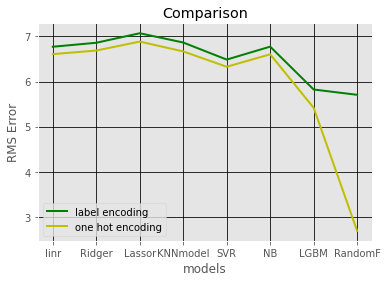

In [33]:
from matplotlib import style
graph1=np.array([linerror,ridgerror,lassoerror,knnerror,svrerror,b_ridge_error,lgbmerror,randomferror])
graph2=np.array([linrOHE_error,ridgerOHE_error,lassorOHE_error,knnOHE_error,svrerror_OHE,b_ridgeOHE_error,lgbmOHE_error,randomfOHE_error])
style.use("ggplot")
plt.plot(["linr","Ridger","Lassor","KNNmodel","SVR","NB","LGBM","RandomF"],graph1,"g",label="label encoding",linewidth=2)
plt.plot(["linr","Ridger","Lassor","KNNmodel","SVR","NB","LGBM","RandomF"],graph2,"y",label="one hot encoding",linewidth=2)
plt.title("Comparison")
plt.xlabel("models")
plt.ylabel("RMS Error")
plt.legend() 
plt.grid(True,color="k")
plt.show